In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import io

from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

# Settings
pd.options.display.max_columns = None
pd.options.display.max_rows = 10

In [2]:
# Deklaration
path = "../Datasets/"

# Clean the Dataset, because bad Separator
with open(path + 'netflix_titles.csv', encoding='utf-8') as f:
    data=f.read()
    
data = data.replace('|', ';').replace(',', '|')
    
# Covert IO obj to Dataframe
dataIO = io.StringIO(data)

df = pd.read_csv(dataIO, 
                 sep='|',
                 decimal='.')

# Replace bad new lines
df = df.replace('\n', ' ', regex=True)

In [3]:
# Bereinigung des DFs
# Leere Spalten löschen
unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(labels=unnamed_cols, axis=1)

# Leere Datensätze löschen ODER füllen mit none
print('Datensatzlänge vor Bereinigung: ' + str(len(df)))
# dropna VS fillna -> Datasetabhänig
for col in df.columns:
    if df[col].isnull().sum() > 0 and col != 'date_added':
        print(col + ": " + str(df[col].isnull().sum()))
        df[col].fillna("none", inplace = True) 
df = df.dropna()

# bei drop -> nur 3774 bleiben über
print('Datensatzlänge nach Bereinigung: ' + str(len(df)))

Datensatzlänge vor Bereinigung: 6234
director: 1969
cast: 570
country: 476
rating: 10
Datensatzlänge nach Bereinigung: 6223


In [4]:
# Write clean CSV
df.to_csv(path + 'netflix_titles_clean.csv',
          sep='|',
          decimal='.',
          index=False)

df = pd.read_csv(path + 'netflix_titles_clean.csv',
          sep='|',
          decimal='.')

In [5]:
df.head(2)

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   

                   director  \
0  Richard Finn, Tim Maltby   
1                      none   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   

  rating duration                           listed_in  \
0  TV-PG   90 min  Children & Family Movies, Comedies   
1  TV-MA   94 min                     Stand-Up Comedy   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...

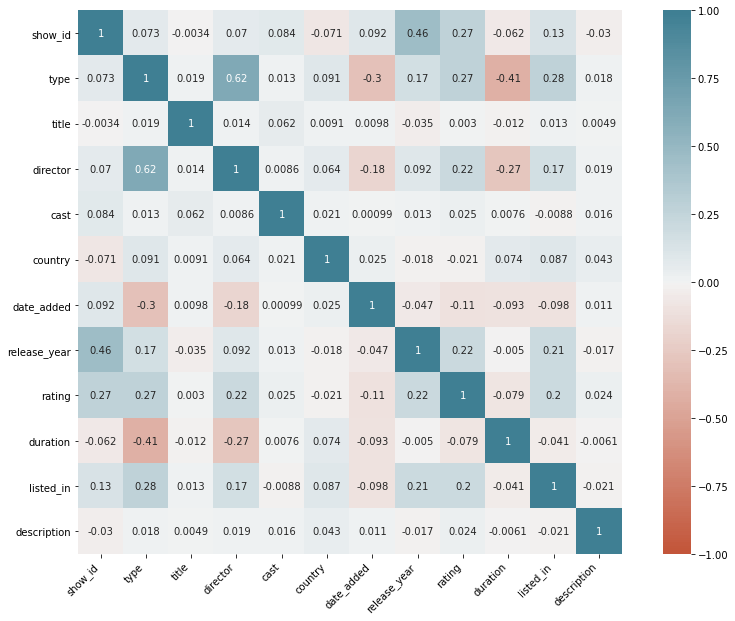

In [6]:
# Datenvorbereiten um Correlation zu berechen
for col in df.columns: 
    df[col]=df[col].astype('category').cat.codes


# Heatmap um Zusammenhänge zu erkennen
plt.subplots(figsize=(15,10))
ax = sns.heatmap(
    df.corr(),
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
clear_output(wait=True)